# PySpark Logistic Regression Summary

Our full dataset file has around 9 million samples. When trying to run feature_generator.

All models were executed through notebooks in the pyspark folder via command line

Machine:
* 2018 Mac Mini - 6 core

Docker Configuration:
* 9 CPUs
* 24 GB Ram
* 3 GB swap




In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import json

import util.report_util as ru

log = logging.getLogger(__name__)
logging.basicConfig(level=logging.WARN)
sns.set()
%matplotlib inline

DEBUG = False

REPORT_DIR = "../reports"
REPORT_FILE = "201911-pyspark-report.csv"


/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vinceluk/anaconda3/envs/

In [2]:
report = pd.read_csv(f'{REPORT_DIR}/{REPORT_FILE}', quotechar="'")

In [9]:
report["eval_metric"] = report.classification_report.apply(lambda x: ru.calculate_metric(json.loads(x)))

# Model score stops improving after 2 million samples

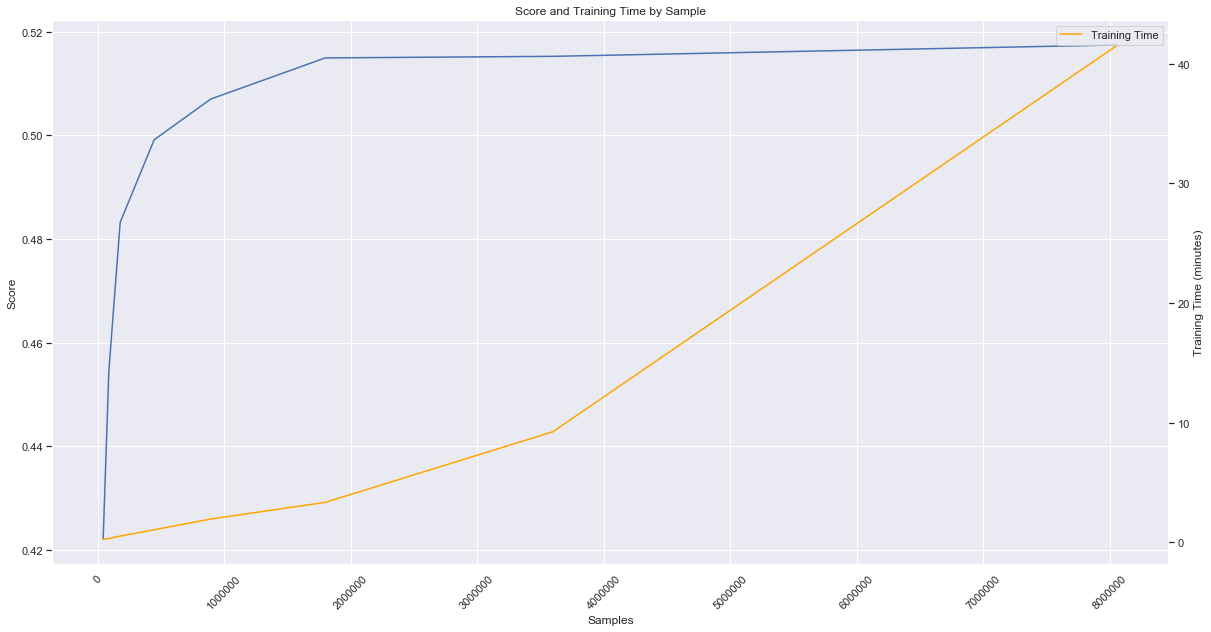

In [10]:
f, a = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(data=report, x="train_examples", y="eval_metric", sort=False)
_ = plt.xticks(rotation=45)
_ = plt.xlabel("Samples")
_ = plt.ylabel("Score")


a2 = a.twinx()
_ = sns.lineplot(data = report, x = "train_examples", y = "train_time_min", sort = False, ax=a2, label="Training Time", color="orange")
_ = plt.ylabel("Training Time (minutes)")
a2.grid(False)

_ = plt.title("Score and Training Time by Sample")
